In [1]:
import pandas as pd
import numpy as np
from statsmodels.graphics.tsaplots import plot_acf
from pandas.plotting import autocorrelation_plot

In [2]:
df = pd.read_json('all_totals.json')

In [3]:
df['rows']= df['rows'].astype(str)

In [4]:
df['rows']

0       {'key': ['2020-01-30T13:33:00.00+05:30', 'acti...
1       {'key': ['2020-01-30T13:33:00.00+05:30', 'cure...
2       {'key': ['2020-01-30T13:33:00.00+05:30', 'deat...
3       {'key': ['2020-01-30T13:33:00.00+05:30', 'tota...
4       {'key': ['2020-02-02T10:39:00.00+05:30', 'acti...
                              ...                        
1283    {'key': ['2020-11-19T08:00:00.00+05:30', 'tota...
1284    {'key': ['2020-11-20T08:00:00.00+05:30', 'acti...
1285    {'key': ['2020-11-20T08:00:00.00+05:30', 'cure...
1286    {'key': ['2020-11-20T08:00:00.00+05:30', 'deat...
1287    {'key': ['2020-11-20T08:00:00.00+05:30', 'tota...
Name: rows, Length: 1288, dtype: object

In [5]:
df['rows'] = df['rows'].apply(lambda x : str(x).replace('{\'key\':',''))

In [6]:
df['rows'] = df['rows'].apply(lambda x : str(x).replace('[','').replace(']','').replace('}',''))

In [7]:
df['rows']

0        '2020-01-30T13:33:00.00+05:30', 'active_cases...
1        '2020-01-30T13:33:00.00+05:30', 'cured', 'val...
2        '2020-01-30T13:33:00.00+05:30', 'death', 'val...
3        '2020-01-30T13:33:00.00+05:30', 'total_confir...
4        '2020-02-02T10:39:00.00+05:30', 'active_cases...
                              ...                        
1283     '2020-11-19T08:00:00.00+05:30', 'total_confir...
1284     '2020-11-20T08:00:00.00+05:30', 'active_cases...
1285     '2020-11-20T08:00:00.00+05:30', 'cured', 'val...
1286     '2020-11-20T08:00:00.00+05:30', 'death', 'val...
1287     '2020-11-20T08:00:00.00+05:30', 'total_confir...
Name: rows, Length: 1288, dtype: object

In [8]:
df.iloc[0,0]

" '2020-01-30T13:33:00.00+05:30', 'active_cases', 'value': 1"

In [9]:
df['date'] = df['rows'].apply(lambda x : str(x).split(',')[0])
df['category'] = df['rows'].apply(lambda x : str(x).split(',')[1])
df['value'] = df['rows'].apply(lambda x : str(x).split(',')[2].replace('\'value\':',''))

In [11]:
df.head()

,rows,date,category,value
0,"'2020-01-30T13:33:00.00+05:30', 'active_cases...",'2020-01-30T13:33:00.00+05:30','active_cases',1
1,"'2020-01-30T13:33:00.00+05:30', 'cured', 'val...",'2020-01-30T13:33:00.00+05:30','cured',0
2,"'2020-01-30T13:33:00.00+05:30', 'death', 'val...",'2020-01-30T13:33:00.00+05:30','death',0
3,"'2020-01-30T13:33:00.00+05:30', 'total_confir...",'2020-01-30T13:33:00.00+05:30','total_confirmed_cases',1
4,"'2020-02-02T10:39:00.00+05:30', 'active_cases...",'2020-02-02T10:39:00.00+05:30','active_cases',2


In [12]:
df['category'].value_counts()

 'death'                    322
 'cured'                    322
 'active_cases'             322
 'total_confirmed_cases'    322
Name: category, dtype: int64

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1288 entries, 0 to 1287
Data columns (total 4 columns):
rows        1288 non-null object
date        1288 non-null object
category    1288 non-null object
value       1288 non-null object
dtypes: object(4)
memory usage: 40.4+ KB


In [14]:
df['category']=df['category'].astype(str)

In [15]:
df[df['category']=='active_cases']

,rows,date,category,value


In [16]:
df['date']= df['date'].apply(lambda x : str(x).replace('\'', ''))

In [17]:
df

,rows,date,category,value
0,"'2020-01-30T13:33:00.00+05:30', 'active_cases...",2020-01-30T13:33:00.00+05:30,'active_cases',1
1,"'2020-01-30T13:33:00.00+05:30', 'cured', 'val...",2020-01-30T13:33:00.00+05:30,'cured',0
2,"'2020-01-30T13:33:00.00+05:30', 'death', 'val...",2020-01-30T13:33:00.00+05:30,'death',0
3,"'2020-01-30T13:33:00.00+05:30', 'total_confir...",2020-01-30T13:33:00.00+05:30,'total_confirmed_cases',1
4,"'2020-02-02T10:39:00.00+05:30', 'active_cases...",2020-02-02T10:39:00.00+05:30,'active_cases',2
...,...,...,...,...
1283,"'2020-11-19T08:00:00.00+05:30', 'total_confir...",2020-11-19T08:00:00.00+05:30,'total_confirmed_cases',8958483
1284,"'2020-11-20T08:00:00.00+05:30', 'active_cases...",2020-11-20T08:00:00.00+05:30,'active_cases',443794
1285,"'2020-11-20T08:00:00.00+05:30', 'cured', 'val...",2020-11-20T08:00:00.00+05:30,'cured',8428409
1286,"'2020-11-20T08:00:00.00+05:30', 'death', 'val...",2020-11-20T08:00:00.00+05:30,'death',132162


In [18]:
df['category'] = df['category'].apply(lambda x : str(x).replace('\'',''))

In [19]:
df

,rows,date,category,value
0,"'2020-01-30T13:33:00.00+05:30', 'active_cases...",2020-01-30T13:33:00.00+05:30,active_cases,1
1,"'2020-01-30T13:33:00.00+05:30', 'cured', 'val...",2020-01-30T13:33:00.00+05:30,cured,0
2,"'2020-01-30T13:33:00.00+05:30', 'death', 'val...",2020-01-30T13:33:00.00+05:30,death,0
3,"'2020-01-30T13:33:00.00+05:30', 'total_confir...",2020-01-30T13:33:00.00+05:30,total_confirmed_cases,1
4,"'2020-02-02T10:39:00.00+05:30', 'active_cases...",2020-02-02T10:39:00.00+05:30,active_cases,2
...,...,...,...,...
1283,"'2020-11-19T08:00:00.00+05:30', 'total_confir...",2020-11-19T08:00:00.00+05:30,total_confirmed_cases,8958483
1284,"'2020-11-20T08:00:00.00+05:30', 'active_cases...",2020-11-20T08:00:00.00+05:30,active_cases,443794
1285,"'2020-11-20T08:00:00.00+05:30', 'cured', 'val...",2020-11-20T08:00:00.00+05:30,cured,8428409
1286,"'2020-11-20T08:00:00.00+05:30', 'death', 'val...",2020-11-20T08:00:00.00+05:30,death,132162


In [20]:
df[df['category']=='total_confirmed_cases']

,rows,date,category,value


In [21]:
df['value'] = df['value'].astype(int)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1288 entries, 0 to 1287
Data columns (total 4 columns):
rows        1288 non-null object
date        1288 non-null object
category    1288 non-null object
value       1288 non-null int32
dtypes: int32(1), object(3)
memory usage: 35.3+ KB


In [23]:
df['category'] = df['category'].astype(str)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1288 entries, 0 to 1287
Data columns (total 4 columns):
rows        1288 non-null object
date        1288 non-null object
category    1288 non-null object
value       1288 non-null int32
dtypes: int32(1), object(3)
memory usage: 35.3+ KB


In [25]:
df['category'].value_counts()

 total_confirmed_cases    322
 death                    322
 cured                    322
 active_cases             322
Name: category, dtype: int64

In [26]:
df['category'] = df['category'].apply(lambda x : str(x).strip())

In [27]:
total_cases_df=df[df['category']=='total_confirmed_cases']

In [28]:
total_cases_df

,rows,date,category,value
3,"'2020-01-30T13:33:00.00+05:30', 'total_confir...",2020-01-30T13:33:00.00+05:30,total_confirmed_cases,1
7,"'2020-02-02T10:39:00.00+05:30', 'total_confir...",2020-02-02T10:39:00.00+05:30,total_confirmed_cases,2
11,"'2020-02-03T12:13:00.00+05:30', 'total_confir...",2020-02-03T12:13:00.00+05:30,total_confirmed_cases,3
15,"'2020-03-02T14:28:00.00+05:30', 'total_confir...",2020-03-02T14:28:00.00+05:30,total_confirmed_cases,5
19,"'2020-03-03T19:36:00.00+05:30', 'total_confir...",2020-03-03T19:36:00.00+05:30,total_confirmed_cases,6
...,...,...,...,...
1271,"'2020-11-16T08:00:00.00+05:30', 'total_confir...",2020-11-16T08:00:00.00+05:30,total_confirmed_cases,8845127
1275,"'2020-11-17T08:00:00.00+05:30', 'total_confir...",2020-11-17T08:00:00.00+05:30,total_confirmed_cases,8874290
1279,"'2020-11-18T08:00:00.00+05:30', 'total_confir...",2020-11-18T08:00:00.00+05:30,total_confirmed_cases,8912907
1283,"'2020-11-19T08:00:00.00+05:30', 'total_confir...",2020-11-19T08:00:00.00+05:30,total_confirmed_cases,8958483


In [29]:
df =df[df['category'].str.match('active_cases')]

In [30]:
len(df)

322

In [31]:
#df.drop(['date'],axis=1,inplace=True)

In [32]:
#df['date'] = pd.date_range(start='2020-01-30', end='2020-11-20')

In [33]:
df.to_csv('export.csv')

In [34]:
df.head()

,rows,date,category,value
0,"'2020-01-30T13:33:00.00+05:30', 'active_cases...",2020-01-30T13:33:00.00+05:30,active_cases,1
4,"'2020-02-02T10:39:00.00+05:30', 'active_cases...",2020-02-02T10:39:00.00+05:30,active_cases,2
8,"'2020-02-03T12:13:00.00+05:30', 'active_cases...",2020-02-03T12:13:00.00+05:30,active_cases,3
12,"'2020-03-02T14:28:00.00+05:30', 'active_cases...",2020-03-02T14:28:00.00+05:30,active_cases,5
16,"'2020-03-03T19:36:00.00+05:30', 'active_cases...",2020-03-03T19:36:00.00+05:30,active_cases,6


In [35]:
df['date']=df['date'].apply(lambda x : str(x)[:11])

C:\Users\SANDESH\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [36]:
df['date'].apply(lambda x : str(x)[6:8])

0       01
4       02
8       02
12      03
16      03
        ..
1268    11
1272    11
1276    11
1280    11
1284    11
Name: date, Length: 322, dtype: object

In [37]:
covidDict={}

In [38]:
def getActivecasesFromEachMonth(row):
    if row['date'][9:11] in ['30','31']:
        month=row['date'][6:8]
        covidDict[month]=row['value']
        

In [39]:
df.apply(getActivecasesFromEachMonth,axis=1)

0       None
4       None
8       None
12      None
16      None
        ... 
1268    None
1272    None
1276    None
1280    None
1284    None
Length: 322, dtype: object

In [40]:
covidDict

{'01': 1,
 '03': 1200,
 '04': 23882,
 '05': 84504,
 '06': 215125,
 '07': 545318,
 '08': 781975,
 '09': 940441,
 '10': 582649}

In [41]:
import matplotlib.pyplot as plt

In [42]:
covidDict.keys()

dict_keys(['01', '03', '04', '05', '06', '07', '08', '09', '10'])

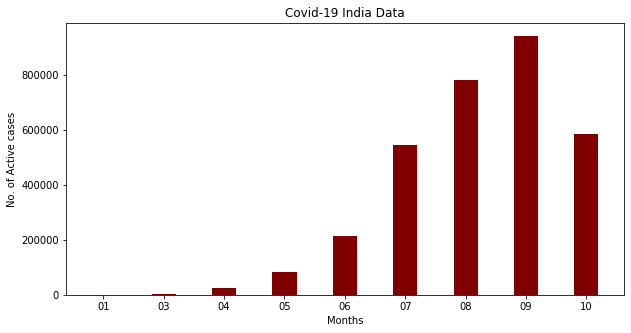

In [43]:
fig = plt.figure(figsize = (10, 5)) 
  
# creating the bar plot 
plt.bar(list(covidDict.keys()), list(covidDict.values()), color ='maroon',  
        width = 0.4) 
  
plt.xlabel("Months") 
plt.ylabel("No. of Active cases") 
plt.title("Covid-19 India Data") 
plt.show() 

In [44]:
totalCovidDict={}

In [45]:
total_cases_df.head()

,rows,date,category,value
3,"'2020-01-30T13:33:00.00+05:30', 'total_confir...",2020-01-30T13:33:00.00+05:30,total_confirmed_cases,1
7,"'2020-02-02T10:39:00.00+05:30', 'total_confir...",2020-02-02T10:39:00.00+05:30,total_confirmed_cases,2
11,"'2020-02-03T12:13:00.00+05:30', 'total_confir...",2020-02-03T12:13:00.00+05:30,total_confirmed_cases,3
15,"'2020-03-02T14:28:00.00+05:30', 'total_confir...",2020-03-02T14:28:00.00+05:30,total_confirmed_cases,5
19,"'2020-03-03T19:36:00.00+05:30', 'total_confir...",2020-03-03T19:36:00.00+05:30,total_confirmed_cases,6


In [46]:
def getConfirmedcasesFromEachMonth(row):
    if row['date'][9:11] in ['30','31']:
        month=row['date'][6:8]
        totalCovidDict[month]=row['value']

In [47]:
total_cases_df.apply(getConfirmedcasesFromEachMonth,axis=1)

3       None
7       None
11      None
15      None
19      None
        ... 
1271    None
1275    None
1279    None
1283    None
1287    None
Length: 322, dtype: object

In [48]:
totalCovidDict

{'01': 1,
 '03': 1359,
 '04': 33330,
 '05': 176652,
 '06': 566840,
 '07': 1638870,
 '08': 3621245,
 '09': 6225763,
 '10': 8137119}

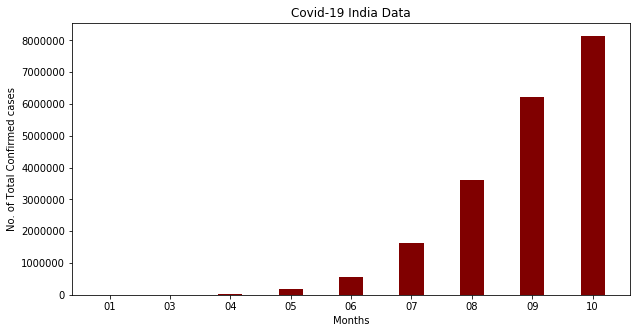

In [49]:
fig = plt.figure(figsize = (10, 5)) 
  
# creating the bar plot 
plt.bar(list(totalCovidDict.keys()), list(totalCovidDict.values()), color ='maroon',  
        width = 0.4) 
  
plt.xlabel("Months") 
plt.ylabel("No. of Total Confirmed cases") 
plt.title("Covid-19 India Data") 
plt.show() 

In [50]:
pd.date_range(start='2020-01-30', end='2020-11-20')

DatetimeIndex(['2020-01-30', '2020-01-31', '2020-02-01', '2020-02-02',
               '2020-02-03', '2020-02-04', '2020-02-05', '2020-02-06',
               '2020-02-07', '2020-02-08',
               ...
               '2020-11-11', '2020-11-12', '2020-11-13', '2020-11-14',
               '2020-11-15', '2020-11-16', '2020-11-17', '2020-11-18',
               '2020-11-19', '2020-11-20'],
              dtype='datetime64[ns]', length=296, freq='D')

In [51]:
df['date'] = pd.to_datetime(df['date'])

C:\Users\SANDESH\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 322 entries, 0 to 1284
Data columns (total 4 columns):
rows        322 non-null object
date        322 non-null datetime64[ns]
category    322 non-null object
value       322 non-null int32
dtypes: datetime64[ns](1), int32(1), object(2)
memory usage: 11.3+ KB


In [53]:
#df['date'] = df['date'].dt.date

In [54]:
df.head()

,rows,date,category,value
0,"'2020-01-30T13:33:00.00+05:30', 'active_cases...",2020-01-30,active_cases,1
4,"'2020-02-02T10:39:00.00+05:30', 'active_cases...",2020-02-02,active_cases,2
8,"'2020-02-03T12:13:00.00+05:30', 'active_cases...",2020-02-03,active_cases,3
12,"'2020-03-02T14:28:00.00+05:30', 'active_cases...",2020-03-02,active_cases,5
16,"'2020-03-03T19:36:00.00+05:30', 'active_cases...",2020-03-03,active_cases,6


In [55]:
df.drop(['category'], axis=1, inplace=True)

C:\Users\SANDESH\Anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [56]:
df

,rows,date,value
0,"'2020-01-30T13:33:00.00+05:30', 'active_cases...",2020-01-30,1
4,"'2020-02-02T10:39:00.00+05:30', 'active_cases...",2020-02-02,2
8,"'2020-02-03T12:13:00.00+05:30', 'active_cases...",2020-02-03,3
12,"'2020-03-02T14:28:00.00+05:30', 'active_cases...",2020-03-02,5
16,"'2020-03-03T19:36:00.00+05:30', 'active_cases...",2020-03-03,6
...,...,...,...
1268,"'2020-11-16T08:00:00.00+05:30', 'active_cases...",2020-11-16,465478
1272,"'2020-11-17T08:00:00.00+05:30', 'active_cases...",2020-11-17,453401
1276,"'2020-11-18T08:00:00.00+05:30', 'active_cases...",2020-11-18,446805
1280,"'2020-11-19T08:00:00.00+05:30', 'active_cases...",2020-11-19,443303


In [57]:
import matplotlib.pyplot as plt

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 322 entries, 0 to 1284
Data columns (total 2 columns):
date     322 non-null datetime64[ns]
value    322 non-null int32
dtypes: datetime64[ns](1), int32(1)
memory usage: 6.3 KB


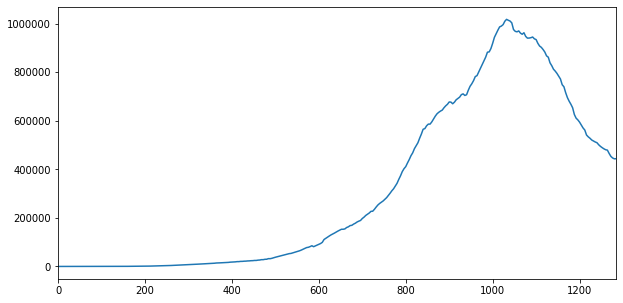

In [71]:
df['value'].plot(figsize=(10,5))
plt.show()


In [74]:
df.drop(['rows'],axis=1,inplace=True)

In [75]:
df.head()

,date,value
0,2020-01-30,1
4,2020-02-02,2
8,2020-02-03,3
12,2020-03-02,5
16,2020-03-03,6


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 322 entries, 0 to 1284
Data columns (total 3 columns):
rows     322 non-null object
date     322 non-null datetime64[ns]
value    322 non-null int32
dtypes: datetime64[ns](1), int32(1), object(1)
memory usage: 8.8+ KB


In [60]:
df

,rows,date,value
0,"'2020-01-30T13:33:00.00+05:30', 'active_cases...",2020-01-30,1
4,"'2020-02-02T10:39:00.00+05:30', 'active_cases...",2020-02-02,2
8,"'2020-02-03T12:13:00.00+05:30', 'active_cases...",2020-02-03,3
12,"'2020-03-02T14:28:00.00+05:30', 'active_cases...",2020-03-02,5
16,"'2020-03-03T19:36:00.00+05:30', 'active_cases...",2020-03-03,6
...,...,...,...
1268,"'2020-11-16T08:00:00.00+05:30', 'active_cases...",2020-11-16,465478
1272,"'2020-11-17T08:00:00.00+05:30', 'active_cases...",2020-11-17,453401
1276,"'2020-11-18T08:00:00.00+05:30', 'active_cases...",2020-11-18,446805
1280,"'2020-11-19T08:00:00.00+05:30', 'active_cases...",2020-11-19,443303


In [61]:
from statsmodels.tsa.stattools import adfuller

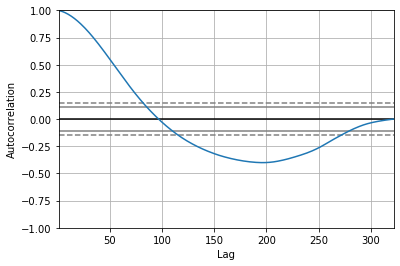

In [62]:
autocorrelation_plot(df['value'])

In [63]:
from pandas.plotting import lag_plot

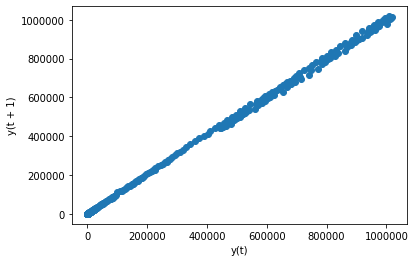

In [64]:
lag_plot(df['value'])

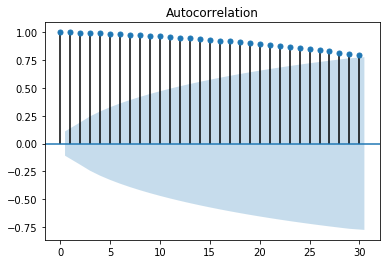

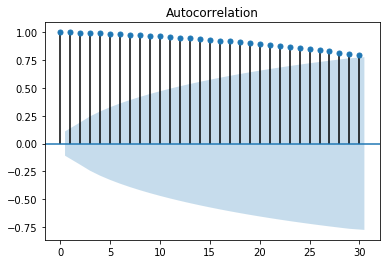

In [65]:
plot_acf(df['value'], lags=30)

In [66]:
def adTest(dataframe):
    dfTest = adfuller(dataframe,autolag='AIC')
    print('1:ADF' ,dfTest[0])
    print('2:P value:' ,dfTest[1])
    print('3: No Of lags' , dfTest[2])
    print('4: No Of Observation used', dfTest[3])
    print('5: Critical Values')
    for key,val in dfTest[4].items():
        print(key , " " , val)
        

In [67]:
adTest(df['value'])

1:ADF -1.47869218607363
2:P value: 0.5440244485945941
3: No Of lags 17
4: No Of Observation used 304
5: Critical Values
1%   -3.452045317832011
5%   -2.871094805558846
10%   -2.571860921485457


In [68]:
from numpy import log

In [69]:
X = log(df['value'])

In [70]:
adTest(X)

1:ADF -3.546562866860624
2:P value: 0.006868755654290856
3: No Of lags 16
4: No Of Observation used 305
5: Critical Values
1%   -3.451973573620699
5%   -2.8710633193086648
10%   -2.5718441306100512


In [78]:
from pmdarima import auto_arima

In [79]:
import warnings

In [80]:
warnings.filterwarnings('ignore')

In [81]:
stepwise_fit = auto_arima(df['value'], trace=True,suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0]             : AIC=6264.457, Time=0.91 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=6361.012, Time=0.05 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=6317.622, Time=0.04 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=6272.383, Time=0.05 sec
 ARIMA(1,2,2)(0,0,0)[0]             : AIC=6262.676, Time=0.34 sec
 ARIMA(0,2,2)(0,0,0)[0]             : AIC=6270.126, Time=0.08 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=6270.923, Time=0.08 sec
 ARIMA(1,2,3)(0,0,0)[0]             : AIC=6267.164, Time=0.29 sec
 ARIMA(0,2,3)(0,0,0)[0]             : AIC=6278.002, Time=0.16 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=6271.098, Time=0.14 sec
 ARIMA(2,2,3)(0,0,0)[0]             : AIC=6236.088, Time=0.70 sec
 ARIMA(3,2,3)(0,0,0)[0]             : AIC=6236.016, Time=0.68 sec
 ARIMA(3,2,2)(0,0,0)[0]             : AIC=6258.936, Time=1.01 sec
 ARIMA(4,2,3)(0,0,0)[0]             : AIC=6233.233, Time=0.83 sec
 ARIMA(4,2,2)(0,0,0)[0]          

In [82]:
stepwise_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  322
Model:               SARIMAX(5, 2, 5)   Log Likelihood               -3094.049
Date:                Mon, 23 Nov 2020   AIC                           6210.097
Time:                        18:58:54   BIC                           6251.549
Sample:                             0   HQIC                          6226.649
                                - 322                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.7671      0.192     -9.224      0.000      -2.143      -1.392
ar.L2         -1.7353      0.384     -4.520      0.000      -2.488      -0.983
ar.L3         -0.9268      0.457     -2.027      0.043      -1.823      -0.031
ar.L4          0.0225      0.350      0.064      0.949      -0.663       0.708
ar.L5          0.3815      0.146      2.610      0.009       0.095       0.668
ma.L1          1.3567      0.181      7.508      0.000       1.003       1.711
ma.L2          0.8572      0.273      3.140      0.002       0.322       1.392
ma.L3         -0.1240      0.261     -0.475      0.634      -0.635       0.387
ma.L4         -0.7194      0.155     -4.637      0.000      -1.024      -0.415
ma.L5         -0.4749      0.082     -5.825      0.000      -0.635      -0.315
sigma2      1.973e+07    6.2e-08   3.18e+14      0.000    1.97e+07    1.97e+07
===================================================================================
Ljung-Box (Q):                      235.92   Jarque-Bera (JB):               317.08
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):             405.16   Skew:                            -0.88
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.54
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.7e+30. Standard errors may be unstable.
"""

In [83]:
from statsmodels.tsa.arima_model import ARIMA

In [84]:
covidModel = ARIMA(df['value'], order=(5,2,5))

In [85]:
covidModel=covidModel.fit()

In [86]:
covidModel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:               D2.value   No. Observations:                  320
Model:                 ARIMA(5, 2, 5)   Log Likelihood               -3071.027
Method:                       css-mle   S.D. of innovations           3537.962
Date:                Mon, 23 Nov 2020   AIC                           6166.054
Time:                        18:59:01   BIC                           6211.274
Sample:                             2   HQIC                          6184.111
                                                                              
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const            -11.2265     84.544     -0.133      0.894    -176.929     154.476
ar.L1.D2.value     0.2649      0.075      3.529      0.000       0.118       0.412
ar.L2.D2.value    -0.9589      0.067    -14.232      0.000      -1.091      -0.827
ar.L3.D2.value     0.0116      0.104      0.112      0.911      -0.192       0.215
ar.L4.D2.value    -0.5684      0.058     -9.746      0.000      -0.683      -0.454
ar.L5.D2.value    -0.4730      0.069     -6.901      0.000      -0.607      -0.339
ma.L1.D2.value    -0.8926      0.079    -11.258      0.000      -1.048      -0.737
ma.L2.D2.value     1.1929      0.092     13.020      0.000       1.013       1.372
ma.L3.D2.value    -0.7850      0.105     -7.512      0.000      -0.990      -0.580
ma.L4.D2.value     0.9164      0.064     14.430      0.000       0.792       1.041
ma.L5.D2.value    -0.2714      0.069     -3.945      0.000      -0.406      -0.137
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.6256           -0.7873j            1.0056           -0.1431
AR.2            0.6256           +0.7873j            1.0056            0.1431
AR.3           -0.2465           -1.0031j            1.0329           -0.2884
AR.4           -0.2465           +1.0031j            1.0329            0.2884
AR.5           -1.9597           -0.0000j            1.9597           -0.5000
MA.1           -0.3735           -1.0171j            1.0835           -0.3060
MA.2           -0.3735           +1.0171j            1.0835            0.3060
MA.3            0.6543           -0.8288j            1.0559           -0.1436
MA.4            0.6543           +0.8288j            1.0559            0.1436
MA.5            2.8151           -0.0000j            2.8151           -0.0000
-----------------------------------------------------------------------------
"""

In [80]:
df.tail()

,rows,date,value
1268,"'2020-11-16T08:00:00.00+05:30', 'active_cases...",2020-11-16,465478
1272,"'2020-11-17T08:00:00.00+05:30', 'active_cases...",2020-11-17,453401
1276,"'2020-11-18T08:00:00.00+05:30', 'active_cases...",2020-11-18,446805
1280,"'2020-11-19T08:00:00.00+05:30', 'active_cases...",2020-11-19,443303
1284,"'2020-11-20T08:00:00.00+05:30', 'active_cases...",2020-11-20,443794


In [81]:
prediction = covidModel.predict(start=len(df), end=len(df)+30,typ='levels' ).rename('Covid Prediction')

In [82]:
prediction.index=pd.date_range(start="2020-11-21",end="2020-12-21").tolist()

In [83]:
len(prediction)

31

In [84]:
prediction

2020-11-21    441679.750008
2020-11-22    441463.858160
2020-11-23    434571.785381
2020-11-24    426432.922185
2020-11-25    422047.812938
2020-11-26    419898.131730
2020-11-27    417592.891104
2020-11-28    416982.257265
2020-11-29    415421.274036
2020-11-30    408905.156341
2020-12-01    401007.635687
2020-12-02    396564.345628
2020-12-03    394011.446278
2020-12-04    391866.457077
2020-12-05    391155.203149
2020-12-06    389114.099825
2020-12-07    382611.770263
2020-12-08    375062.708178
2020-12-09    370460.301977
2020-12-10    367637.709456
2020-12-11    365583.090503
2020-12-12    364733.920473
2020-12-13    362278.073301
2020-12-14    355813.655969
2020-12-15    348532.885538
2020-12-16    343782.000384
2020-12-17    340750.165787
2020-12-18    338746.170540
2020-12-19    337724.865689
2020-12-20    334915.893850
2020-12-21    328498.675426
Name: Covid Prediction, dtype: float64

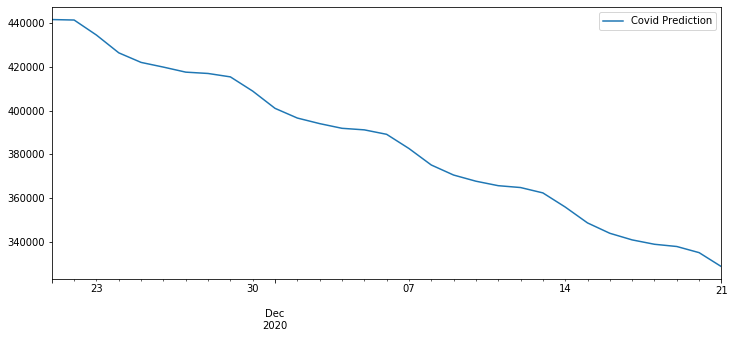

In [85]:
prediction.plot(figsize=(12,5),legend=True)